In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pickle
import gzip

from src.preprocess import preprocess

In [3]:
X, labels = pickle.load(gzip.GzipFile('dataset/12000_btype_balanced.pkl', 'rb'))
X = preprocess(X)

In [26]:
### label informations
ds_beat_names = {
    0: 'undefined',     # Undefined
    1: 'normal',        # Normal
    2: 'pac',           # ESSV (PAC)
    3: 'aberrated',     # Aberrated
    4: 'pvc'            # ESV (PVC)
}

ds_rhythm_names = {
    0: 'undefined',     # Null/Undefined
    1: 'end',           # End (essentially noise)
    2: 'noise',         # Noise
    3: 'normal',        # NSR (normal sinusal rhythm)
    4: 'afib',          # AFib
    5: 'aflut'          # AFlutter
}

one_hot_to_true_label = {
    0: ds_beat_names[1],
    1: ds_beat_names[2],
    2: ds_beat_names[4]
}

def flatten_raw_label(raw_label):
    raw_label_dict = {}
    for i, idx in enumerate(raw_label):
        for j in idx:
            raw_label_dict[j] = ds_beat_names[i]
    return raw_label_dict
    
"""


y['btype'] = {
    1: 0,
    2: 1,
    4: 2
}[y['btype']]
"""

"\n\n\ny['btype'] = {\n    1: 0,\n    2: 1,\n    4: 2\n}[y['btype']]\n"

{169: 'normal',
 386: 'normal',
 606: 'normal',
 824: 'normal',
 1040: 'normal',
 1259: 'normal',
 1479: 'normal',
 1703: 'normal',
 1924: 'normal'}

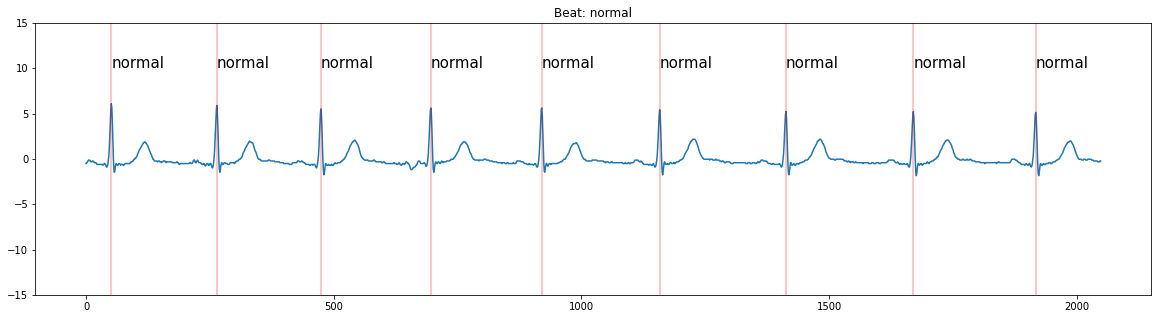

In [61]:
idx = 1000

sample_X = X[idx]
sample_label = labels[idx]

sample_true_label = one_hot_to_true_label[sample_label['btype']]

sample_raw_label = sample_label['btype_raw']
flat_raw_label = flatten_raw_label(sample_raw_label)


plt.figure(figsize=(20, 5))
plt.ylim(-15, 15)

plt.title(f"Beat: {sample_true_label}")

plt.plot(sample_X)
for i, lbl in flat_raw_label.items():
    plt.axvline(i, alpha=0.3, color='r')
    plt.text(i, 10, lbl, fontsize=15)

In [19]:
sample_raw_label

[array([], dtype=int32),
 array([ 169,  386,  606,  824, 1040, 1259, 1479, 1703, 1924], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32)]